<a href="https://colab.research.google.com/github/CagataySencan/TrafficSignRecognition/blob/main/AdverserialAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import seaborn as sn
import matplotlib as mpl
from skimage.util import random_noise
import random

In [ ]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
! unzip gtsrb-german-traffic-sign.zip

In [11]:
trainDatas = pd.DataFrame(pd.read_csv('Train.csv'))
testDatas = pd.DataFrame(pd.read_csv('Test.csv'))
metaDatas = pd.read_csv('Meta.csv')
allDatas = pd.concat((trainDatas,testDatas),sort = False).reset_index(drop = True)
classCount = len(trainDatas['ClassId'].value_counts())
classes = { 0:'Hız Limiti (20km/s)',
            1:'Hız Limiti (30km/s)', 
            2:'Hız Limiti (50km/s)', 
            3:'Hız Limiti (60km/s)', 
            4:'Hız Limiti (70km/s)', 
            5:'Hız Limiti (80km/s)', 
            6:'Hız Limitinin bitişi (80km/s)', 
            7:'Hız Limiti (100km/s)', 
            8:'Hız Limiti (120km/s)', 
            9:'Geçiş yok', 
            10:'Ağırlığı 3.5 ton üstü olan araçlar geçemez', 
            11:'Kavşakta geçiş hakkı', 
            12:'Öncelikli yol', 
            13:'Yol ver', 
            14:'Dur', 
            15:'Araç giremez', 
            16:'3.5 Ton üzeri araçlar yasak', 
            17:'Giriş yok', 
            18:'Genel uyarı', 
            19:'Sola tehlikeli viraj', 
            20:'Sağa tehlikeli viraj', 
            21:'Sağa tehlikeli devamlı virajlar', 
            22:'Engebeli yol', 
            23:'Kaygan yol', 
            24:'Sağdan daralan yol', 
            25:'Yol çalışması', 
            26:'Trafik işaretleri', 
            27:'Yaya geçidi', 
            28:'Okul geçidi', 
            29:'Bisiklet yolu', 
            30:'Buzlanmaya dikkat',
            31:'Vahşi hayvan çıkabilir', 
            32:'Hız sınırı sonu', 
            33:'Sadece sağa dönüş var', 
            34:'Sadece sola dönüş var', 
            35:'Dönüş yok', 
            36:'Sola dönüş yok', 
            37:'Sağa dönüş yok', 
            38:'Sağdan gidin', 
            39:'Soldan gidin', 
            40:'Dönüş önceliği', 
            41:'Geçiş olmayan yolun sonu', 
            42:'3.5 Ton üzeri araçlar girebilir' }
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [111]:
# Görüntüleri uygun formata getirme işlemi
height = 30
width = 30
channel = 3

trainData = []
trainLabel = []
for i in range(43) :
    path = "/content/Train/{0}/".format(i)

    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            trainData.append(np.array(size_image))
            trainLabel.append(i)
        except AttributeError:
            print(" ")

trainData = np.array(trainData)
trainLabel = np.array(trainLabel)
print(trainData.shape, trainLabel.shape)

labels = testDatas["ClassId"].values
imgs = testDatas["Path"].values

data =[]
j = len(testDatas['Path'].value_counts())
for i in range(int((j*9)/10)):
    n = random.randint(1,j)
    try:
        image = cv2.imread(testDatas["Path"][n])
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height,width))
        data.append(np.array(resize_image))
    except:
        print("Error in ")
X_Test = np.array(data).astype('float32')
X_Test = X_Test/255

(39209, 30, 30, 3) (39209,)
Error in 


In [13]:
# Eğitim verimizin validation ve eğitim kısmına bölünmesi
X_Train, X_Validate, Y_Train, Y_Validate = train_test_split(trainData,trainLabel,test_size=0.3,random_state=42)

X_Train = X_Train/255 
X_Validate = X_Validate/255 
print(X_Train.shape,X_Validate.shape)
# Validation ve eğitim için veriler bölündü

(27446, 30, 30, 3) (11763, 30, 30, 3)


In [112]:
# Test Verisinin Bir Kısmına Gürültü Ekleme İşlemi
dataNoisy =[]
for i in range(int(len(testDatas['Path'].value_counts())/10)+1):
    n = random.randint(1,int(len(testDatas['Path'].value_counts())/10))
    try:
        image = cv2.imread(testDatas["Path"][n])
        image = random_noise(image, mode='s&p',amount=0.3)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height,width))    
        dataNoisy.append(np.array(resize_image))
    except:
        print("Error in ")

X_TestNoisy = np.array(dataNoisy).astype('float32')
X_TestNoisy = X_TestNoisy/255

In [115]:
X_TestFinal = np.concatenate((X_Test,X_TestNoisy)).astype('float32')
random.shuffle(X_TestFinal)

In [ ]:
Y_Train = to_categorical(Y_Train,num_classes = 43)
Y_Validate = to_categorical(Y_Validate,num_classes = 43)

print(Y_Train.shape)
print(Y_Validate.shape)

In [15]:
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(height,width,channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))



model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
epochs = 30
history = model.fit(X_Train, Y_Train, batch_size=32, epochs=epochs,
validation_data=(X_Validate, Y_Validate))

In [ ]:
predict= model.predict(X_Test) 
classPred= np.argmax(predict,axis=1)
# Confusion Matrix
from sklearn.metrics import confusion_matrix

df_cm = pd.DataFrame(confusion_matrix(labels, classPred), index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import accuracy_score
print("Accuracy score : %",accuracy_score(labels, classPred)*100)



In [ ]:
plt.imshow(Image.open("/content/addsadsadsad.jpg"))

plt.show()

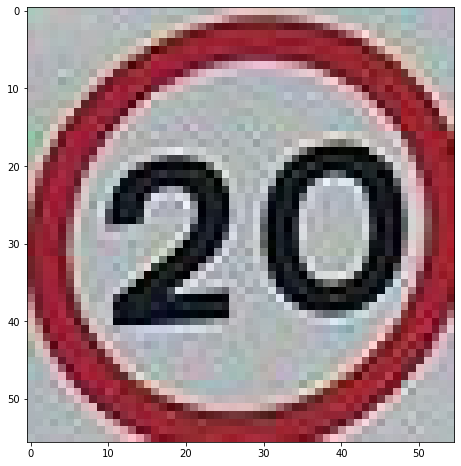

Giriş yok


In [122]:
imageMatrix = []
image = cv2.imread("/content/addsadsadsad.jpg")
image = random_noise(image, mode='s&p',amount=0.3)
imageFromArray = Image.fromarray(image, 'RGB')
resizeImage = imageFromArray.resize((height,width))
imageMatrix.append(np.array(resizeImage))

croppedImage = np.array(imageMatrix)
croppedImage = croppedImage/255
croppedImage

predict= model.predict(croppedImage) 
classPred= np.argmax(predict,axis=1)
plt.imshow(Image.open("/content/addsadsadsad.jpg"))
plt.show()
print(classes[classPred[0]])